In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [ ]:
# Load iris dataset
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:

print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


In [ ]:
print( df.duplicated().sum())

1


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Remove outliers using IQR
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"After removing outliers: {df.shape}")


After removing outliers: (145, 6)


In [ ]:
X = df[iris.feature_names].values
y = df['target'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=200)

In [ ]:
# Predict labels
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


In [ ]:
# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Train Accuracy: 0.96
Test Accuracy: 0.93


In [ ]:
probs = model.predict_proba(X_test_scaled)
print("Class Probabilities for first test sample:", probs[0])


Class Probabilities for first test sample: [0.1030194  0.85601385 0.04096675]


In [ ]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



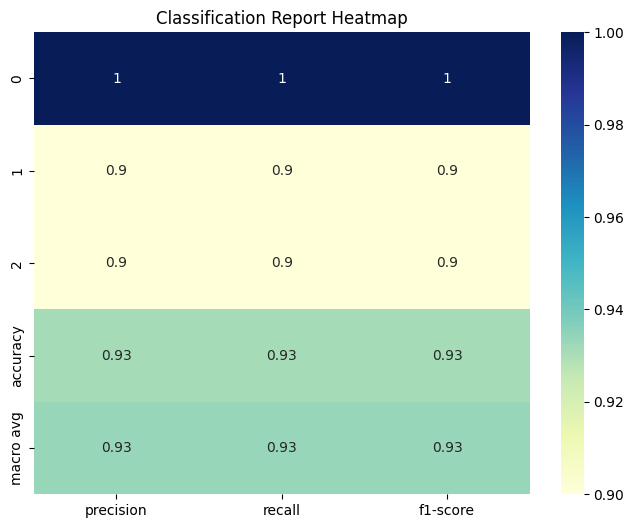

In [ ]:
# Classification report heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

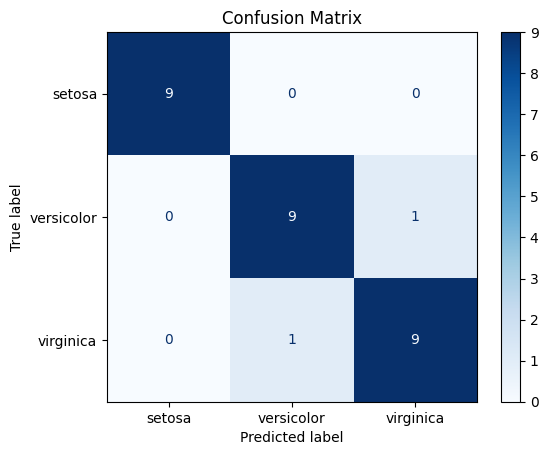

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


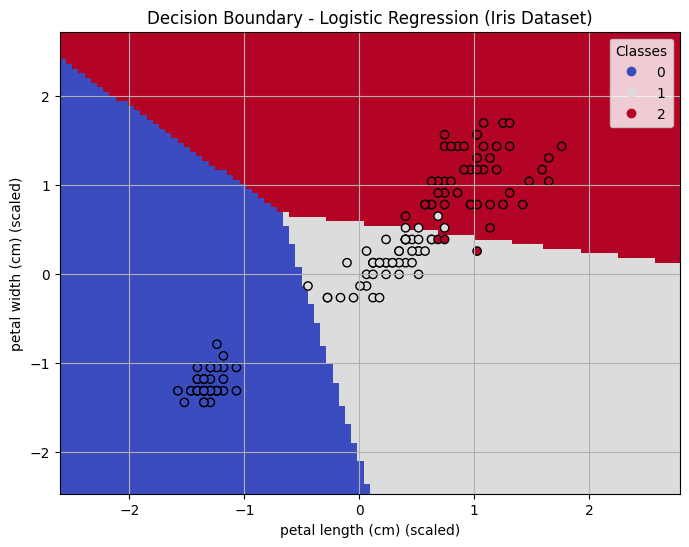

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Select 2 features for visualization
features_to_plot = ['petal length (cm)', 'petal width (cm)']
X_vis = df[features_to_plot].values
y_vis = df['target'].values

# Split and scale for decision boundary
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

scaler_vis = StandardScaler()
X_vis_train_scaled = scaler_vis.fit_transform(X_vis_train)
X_vis_test_scaled = scaler_vis.transform(X_vis_test)

# Train new model for decision boundary
model_vis = LogisticRegression(multi_class='ovr', max_iter=200)
model_vis.fit(X_vis_train_scaled, y_vis_train)

# Plot decision boundary
_, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    model_vis,
    scaler_vis.transform(X_vis),  # apply the same scaler to the whole dataset
    response_method="predict",
    cmap=plt.cm.coolwarm,
    ax=ax,
    xlabel=features_to_plot[0] + " (scaled)",
    ylabel=features_to_plot[1] + " (scaled)",
    plot_method="pcolormesh",
    shading="auto"
)

# Scatter original points
scatter = ax.scatter(
    scaler_vis.transform(X_vis)[:, 0], scaler_vis.transform(X_vis)[:, 1],
    c=y_vis, edgecolor="k", cmap=plt.cm.coolwarm
)
plt.title("Decision Boundary - Logistic Regression (Iris Dataset)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()
